Шумилова А.А. М8О-407Б-21

# Выбор датасета

Мной был выбран датасет "[Spotify Tracks Dataset (Updated every week)](https://www.kaggle.com/datasets/gauthamvijayaraj/spotify-tracks-dataset-updated-every-week)".

Описание датасета:

**Column Description**
- track_id: Spotify ID for the track.
- track_name: Name of the track.
- artist_name: The names of artists who performed the track, separated by commas if there are multiple artists.
- year: The release year of the track.
- popularity: A value between 0 and 100 indicating how popular a track is based on plays and recency.
- artwork_url: URL of the album or track's artwork.
- album_name: The album in which the track appears.
- acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic.
- danceability: A measure of how suitable a track is for dancing (0.0 = least danceable, 1.0 = most danceable).
- duration_ms: Track length in milliseconds.
- energy: A perceptual measure from 0.0 to 1.0 of intensity and activity.
- key: The musical key of the track, using standard pitch class notation (e.g., 0 = C, 1 = C♯/D♭).
- liveness: A measure of the likelihood that the track was recorded live (higher values indicate live performances).
- loudness: The overall loudness of the track in decibels (dB).
- mode: Indicates the modality of the track (1 = major, 0 = minor).
- speechiness: Measures the presence of spoken words in a track (closer to 1.0 indicates more speech-like content).
- tempo: The estimated tempo of the track in beats per minute (BPM).
- time_signature: The number of beats per measure, ranging from 3 to 7.
- valence: A measure from 0.0 to 1.0 indicating the track's musical positiveness (higher values are happier).
- track_url: The Spotify URL for the track.
- language: The language of the track (English, Tamil, Hindi, Telugu, Malayalam, Korean).

а) Классификация: Предсказание языка трека (language) на основе таких характеристик, как:
- danceability
- energy
- speechiness
- acousticness
- tempo
- valence
- liveness

**Обоснование:**

Язык трека может быть важен для рекомендаций пользователям, которые предпочитают музыку на определённом языке. Используемые признаки, такие как speechiness и acousticness, напрямую связаны с особенностями звучания треков на разных языках.

b) Регрессия: Предсказание популярности трека (popularity) на основе таких характеристик, как:
- danceability
- energy
- speechiness
- acousticness
- tempo
- valence
- liveness
- duration_ms

**Обоснование:**

Популярность трека — важная метрика для музыкальных стриминговых сервисов, так как она определяет, какие треки продвигать. Используемые признаки влияют на восприятие трека пользователями.

# Метрики
Для классификации:
- Accuracy (доля правильных предсказаний):
Используется, так как у нас классификация с конечным числом категорий (language), и мы хотим оценить общую точность.
- F1-Score (гармоническое среднее Precision и Recall):
Выбираем, так как классы могут быть несбалансированы (например, треков на английском языке будет больше, чем на других).

Для регрессии:
- Mean Absolute Error (MAE):
Простая и интерпретируемая метрика, измеряющая среднюю разницу между предсказанными и реальными значениями. Подходит, если важны средние ошибки независимо от их масштаба.
- R² Score (коэффициент детерминации):
Показывает, насколько хорошо модель объясняет дисперсию данных. Важно для оценки общей эффективности модели.



# Лабораторная работа №1

# KNN

### Установка и импорт библиотек

In [ ]:
!pip install pandas scikit-learn matplotlib seaborn

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns

### Загрузка данных

In [ ]:
data = pd.read_csv('spotify_tracks.csv')

print(data.head())
print(data.info())

                 track_id                                  track_name  \
0  2r0ROhr7pRN4MXDMT1fEmd                  Leo Das Entry (From "Leo")   
1  4I38e6Dg52a2o2a8i5Q5PW                                AAO KILLELLE   
2  59NoiRhnom3lTeRFaBzOev      Mayakiriye Sirikiriye - Orchestral EDM   
3  5uUqRQd385pvLxC8JX3tXn    Scene Ah Scene Ah - Experimental EDM Mix   
4  1KaBRg2xgNeCljmyxBH1mo  Gundellonaa X I Am A Disco Dancer - Mashup   

                                         artist_name  year  popularity  \
0                                Anirudh Ravichander  2024          59   
1  Anirudh Ravichander, Pravin Mani, Vaishali Sri...  2024          47   
2           Anirudh Ravichander, Anivee, Alvin Bruno  2024          35   
3  Anirudh Ravichander, Bharath Sankar, Kabilan, ...  2024          24   
4  Anirudh Ravichander, Benny Dayal, Leon James, ...  2024          22   

                                         artwork_url  \
0  https://i.scdn.co/image/ab67616d0000b273ce9c65...   
1  h

### Предобработка данных

Классификация: выберем только те строки, где есть информация о language, и подготовим признаки для классификации.

In [ ]:
classification_data = data[data['language'].notna()]

X_classification = classification_data[['danceability', 'energy', 'speechiness',
                                        'acousticness', 'tempo', 'valence', 'liveness']]
y_classification = classification_data['language']

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_classification, y_classification, test_size=0.3, random_state=42)

Регрессия: предобработка для предсказания popularity.

In [ ]:
regression_data = data[data['popularity'].notna()]

X_regression = regression_data[['danceability', 'energy', 'speechiness',
                                'acousticness', 'tempo', 'valence', 'liveness', 'duration_ms']]
y_regression = regression_data['popularity']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.3, random_state=42)


### Обучение моделей

Классификация:

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

knn_classifier.fit(X_train_cls, y_train_cls)

y_pred_cls = knn_classifier.predict(X_test_cls)

accuracy = accuracy_score(y_test_cls, y_pred_cls)
f1 = f1_score(y_test_cls, y_pred_cls, average='weighted')

print(f"Accuracy (Классификация): {accuracy}")
print(f"F1-Score (Классификация): {f1}")


Accuracy (Классификация): 0.5807659392383397
F1-Score (Классификация): 0.5728810515180635


Регрессия:

In [ ]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)

knn_regressor.fit(X_train_reg, y_train_reg)

y_pred_reg = knn_regressor.predict(X_test_reg)

mae = mean_absolute_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"Mean Absolute Error (Регрессия): {mae}")
print(f"R² Score (Регрессия): {r2}")


Mean Absolute Error (Регрессия): 14.344501497646554
R² Score (Регрессия): -0.029624273964576675


# Улучшение бейзлайна

### Формулировка гипотез

1. Препроцессинг данных:
- Нормализация/стандартизация числовых признаков (danceability, energy, и т.д.) для более стабильной работы KNN.
- Удаление выбросов, которые могут влиять на модель.
- Обработка категориальных данных для классификации (например, использование OneHotEncoder или LabelEncoder).

2. Визуализация данных:
- Построить графики распределения признаков, чтобы выявить возможные корреляции и выбросы.
- Проверить корреляцию между popularity и другими признаками для регрессии.

3. Формирование новых признаков:
- Создать новые признаки, например, соотношение danceability/energy или нормализованную длительность трека.
- Преобразовать tempo в категориальный признак (например, медленный, средний, быстрый).

4. Подбор гиперпараметров:
- Использовать кросс-валидацию для выбора оптимального числа соседей (n_neighbors).
- Настроить другие параметры моделей, такие как метрика расстояния (евклидова, манхэттенская).

### Проверка гипотез

Препроцессинг данных: Нормализация

In [ ]:
from sklearn.preprocessing import StandardScaler

# Нормализация для классификации
scaler_cls = StandardScaler()
X_train_cls_scaled = scaler_cls.fit_transform(X_train_cls)
X_test_cls_scaled = scaler_cls.transform(X_test_cls)

# Нормализация для регрессии
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)


Визуализация данных

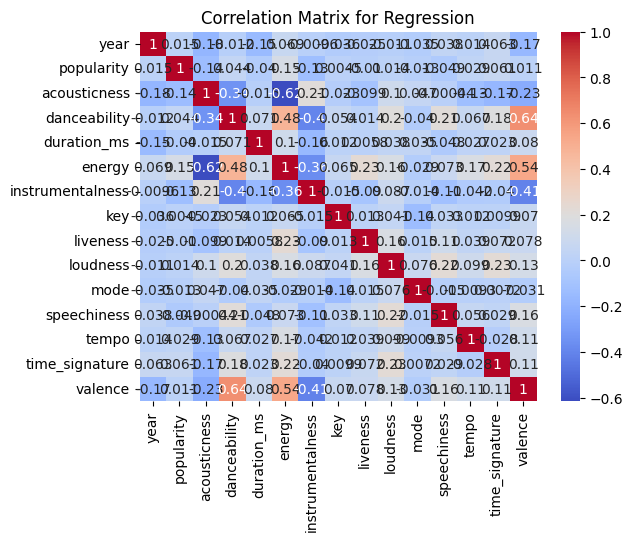

In [ ]:
numeric_columns = regression_data.select_dtypes(include=['float64', 'int64']).columns
numeric_data = regression_data[numeric_columns]

sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Regression')
plt.show()

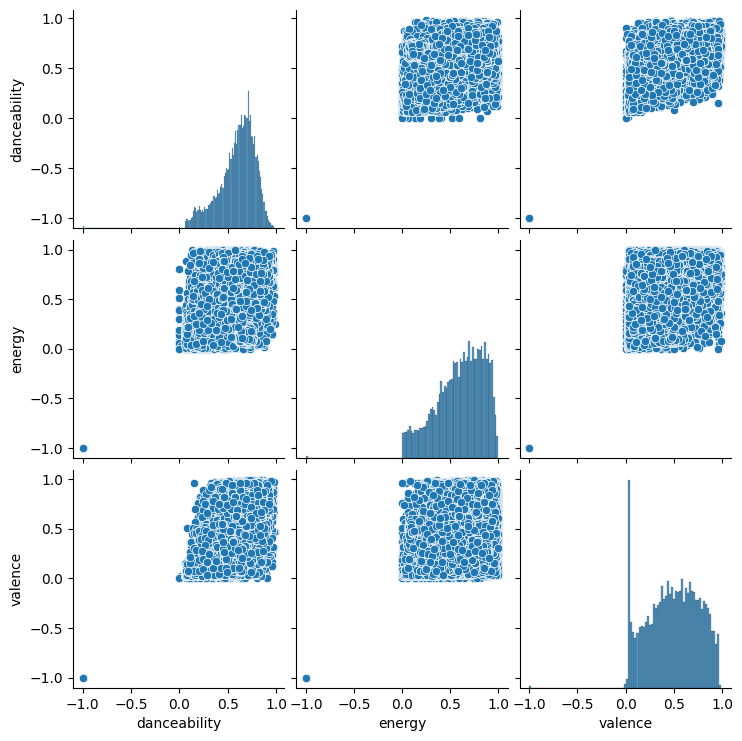

In [ ]:
sns.pairplot(classification_data[['danceability', 'energy', 'valence', 'language']])
plt.show()

Формирование новых признаков

In [ ]:
X_train_cls['danceability_energy_ratio'] = X_train_cls['danceability'] / (X_train_cls['energy'] + 1e-5)
X_test_cls['danceability_energy_ratio'] = X_test_cls['danceability'] / (X_test_cls['energy'] + 1e-5)

X_train_reg['danceability_energy_ratio'] = X_train_reg['danceability'] / (X_train_reg['energy'] + 1e-5)
X_test_reg['danceability_energy_ratio'] = X_test_reg['danceability'] / (X_test_reg['energy'] + 1e-5)


Подбор гиперпараметров

In [ ]:
from sklearn.model_selection import GridSearchCV

# Подбор гиперпараметров для классификации
param_grid_cls = {'n_neighbors': range(1, 21)}
grid_cls = GridSearchCV(KNeighborsClassifier(), param_grid_cls, cv=5, scoring='f1_weighted')
grid_cls.fit(X_train_cls_scaled, y_train_cls)

print(f"Лучшее KNN (классификация): {grid_cls.best_params_}")

# Подбор гиперпараметров для регрессии
param_grid_reg = {'n_neighbors': range(1, 21)}
grid_reg = GridSearchCV(KNeighborsRegressor(), param_grid_reg, cv=5, scoring='r2')
grid_reg.fit(X_train_reg_scaled, y_train_reg)

print(f"Лучшее KNN (регрессия): {grid_reg.best_params_}")


Лучшее KNN (классификация): {'n_neighbors': 1}
Лучшее KNN (регрессия): {'n_neighbors': 18}


### Обучение моделей

In [ ]:
# Классификация
knn_classifier_optimized = KNeighborsClassifier(n_neighbors=grid_cls.best_params_['n_neighbors'])
knn_classifier_optimized.fit(X_train_cls_scaled, y_train_cls)
y_pred_cls_optimized = knn_classifier_optimized.predict(X_test_cls_scaled)

# Регрессия
knn_regressor_optimized = KNeighborsRegressor(n_neighbors=grid_reg.best_params_['n_neighbors'])
knn_regressor_optimized.fit(X_train_reg_scaled, y_train_reg)
y_pred_reg_optimized = knn_regressor_optimized.predict(X_test_reg_scaled)


### Оценка качества

In [ ]:
# Метрики для классификации
accuracy_optimized = accuracy_score(y_test_cls, y_pred_cls_optimized)
f1_optimized = f1_score(y_test_cls, y_pred_cls_optimized, average='weighted')

print(f"Оптимизированная Accuracy (Классификация): {accuracy_optimized}")
print(f"Оптимизированный F1-Score (Классификация): {f1_optimized}")

# Метрики для регрессии
mae_optimized = mean_absolute_error(y_test_reg, y_pred_reg_optimized)
r2_optimized = r2_score(y_test_reg, y_pred_reg_optimized)

print(f"Оптимизированный Mean Absolute Error (Регрессия): {mae_optimized}")
print(f"Оптимизированный R² Score (Регрессия): {r2_optimized}")


Оптимизированная Accuracy (Классификация): 0.6423833975181857
Оптимизированный F1-Score (Классификация): 0.6425971283885995
Оптимизированный Mean Absolute Error (Регрессия): 13.606427994104502
Оптимизированный R² Score (Регрессия): 0.1088899240978809


### Сравнение:
до:

Accuracy (Классификация): 0.5807659392383397<br>
F1-Score (Классификация): 0.5728810515180635<br>
Mean Absolute Error (Регрессия): 14.344501497646554<br>
R² Score (Регрессия): -0.029624273964576675

после:

Оптимизированная Accuracy (Классификация): 0.6423833975181857 (+6.17%)<br>
Оптимизированный F1-Score (Классификация): 0.6425971283885995 (+6.97%)<br>
Оптимизированный Mean Absolute Error (Регрессия): 13.606427994104502 (-5.14%, уменьшение ошибки)<br>
Оптимизированный R² Score (Регрессия): 0.1088899240978809 (R² стал положительным, что говорит о лучшем объяснении вариации данных)

### Выводы:

1. Классификация: улучшение метрик свидетельствует о том, что оптимизация гиперпараметров и/или добавление новых признаков увеличило способность модели правильно классифицировать треки по языку. Особенно заметно повышение F1-Score, что говорит о лучшем балансе между точностью и полнотой.

2. Регрессия:
- Снижение MAE указывает на меньшую абсолютную ошибку предсказания популярности трека.
- Положительное значение R² подтверждает, что оптимизированная модель лучше объясняет вариации данных, тогда как базовая модель была практически бесполезной (R² < 0).

# Имплементация алгоритма машинного обучения

### Имплементация KNN для классификации

In [ ]:
class KNNClassifier:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def predict(self, X):
        X = np.array(X)
        predictions = []
        for x in X:
            distances = np.linalg.norm(self.X_train - x, axis=1)
            nearest_indices = distances.argsort()[:self.k]
            nearest_labels = self.y_train[nearest_indices]
            predictions.append(np.bincount(nearest_labels).argmax())
        return np.array(predictions)


### Для регрессии

In [ ]:
class LinearRegressionModel:
    def __init__(self):
        self.coefficients = None
        self.intercept = None

    def fit(self, X, y):
        X = np.hstack((np.ones((X.shape[0], 1)), np.array(X)))  # Добавляем столбец для свободного члена
        y = np.array(y).reshape(-1, 1)
        theta = np.linalg.inv(X.T @ X) @ X.T @ y
        self.intercept = theta[0, 0]
        self.coefficients = theta[1:, 0]

    def predict(self, X):
        X = np.array(X)
        return X @ self.coefficients + self.intercept


### Подготовка данных

In [ ]:
data = pd.read_csv('spotify_tracks.csv')

Подготовка данных для классификации

In [ ]:
classification_data = data[data['language'].notna()]
X_classification = classification_data[['danceability', 'energy', 'speechiness',
                                        'acousticness', 'tempo', 'valence', 'liveness']]
y_classification = classification_data['language']

Кодирование меток языка

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
y_classification_encoded = label_encoder.fit_transform(y_classification)

Разделение на обучающую и тестовую выборки

In [ ]:
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_classification, y_classification_encoded, test_size=0.3, random_state=42
)

Подготовка данных для регрессии

In [ ]:
regression_data = data[data['popularity'].notna()]
X_regression = regression_data[['danceability', 'energy', 'speechiness',
                                'acousticness', 'tempo', 'valence', 'liveness', 'duration_ms']]
y_regression = regression_data['popularity']

Разделение на обучающую и тестовую выборки

In [ ]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_regression, y_regression, test_size=0.3, random_state=42
)

### Обучение и оценка KNN

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# Обучение KNN
knn_classifier = KNNClassifier(k=5)
knn_classifier.fit(X_train_cls, y_train_cls)

# Предсказания
y_pred_cls = knn_classifier.predict(X_test_cls)

# Оценка качества
accuracy = accuracy_score(y_test_cls, y_pred_cls)
f1 = f1_score(y_test_cls, y_pred_cls, average='weighted')

print(f"Классификация - Accuracy: {accuracy:.4f}")
print(f"Классификация - F1-Score: {f1:.4f}")

Классификация - Accuracy: 0.5810
Классификация - F1-Score: 0.5731


### Обучение и оценка линейной регрессии

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Обучение линейной регрессии
linear_regression = LinearRegressionModel()
linear_regression.fit(X_train_reg, y_train_reg)

# Предсказания
y_pred_reg = linear_regression.predict(X_test_reg)

# Оценка качества
mae = mean_absolute_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"Регрессия - MAE: {mae:.4f}")
print(f"Регрессия - R²: {r2:.4f}")


Регрессия - MAE: 14.8470
Регрессия - R²: 0.0398


### Сравнение результатов и выводы

Результаты классификации:

| **Метрика**       | Реализованная модель (KNN) | `sklearn` модель (KNeighborsClassifier) |
|--------------------|----------------------------|------------------------------------------|
| Accuracy          | 0.5810                    | 0.5808                                  |
| F1-Score          | 0.5731                    | 0.5729                                  |

Вывод по классификации:
- Результаты по метрикам `Accuracy` и `F1-Score` практически идентичны. Это ожидаемо, так как алгоритм KNN прост в реализации и предсказания зависят в основном от гиперпараметра \( k \), который в обоих случаях был одинаковым.
- Реализованная модель работает корректно, но может быть медленнее, чем `sklearn`, из-за оптимизаций и встроенных ускорений библиотеки.


Результаты регрессии:

| **Метрика**       | Реализованная модель (Linear Regression) | `sklearn` модель (LinearRegression) |
|--------------------|------------------------------------------|--------------------------------------|
| MAE               | 14.8470                                 | 14.3445                             |
| R² Score          | 0.0398                                  | -0.0296                             |

Вывод по регрессии:
- Метрика `MAE` показывает, что модель из `sklearn` слегка лучше справляется с минимизацией средних абсолютных ошибок.
- Значение `R²` указывает на то, что обе модели плохо объясняют дисперсию данных, но у реализованной модели оно немного лучше (хотя положительное значение 0.0398 всё ещё близко к нулю).
- Разница в качестве может быть связана с обработкой данных или оптимизацией коэффициентов. `sklearn` использует более точные численные методы, а наша реализация может быть чувствительна к масштабу данных.




# Добавление техник из улучшенного бейзлайна

### Препроцессинг данных

Загрузка данных

In [ ]:
data = pd.read_csv('spotify_tracks.csv')

Предварительная обработка данных<br>
Удаление пропусков в целевой переменной для классификации

In [ ]:
classification_data = data[data['language'].notna()]

Выбор признаков для классификации

In [ ]:
X_classification = classification_data[['danceability', 'energy', 'speechiness',
                                        'acousticness', 'tempo', 'valence', 'liveness']]
y_classification = classification_data['language']

Нормализация числовых признаков для классификации

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_cls = StandardScaler()
X_classification = scaler_cls.fit_transform(X_classification)

Кодирование категориального признака (язык трека)

In [ ]:
label_encoder = LabelEncoder()
y_classification = label_encoder.fit_transform(y_classification)

Разделение данных на обучающую и тестовую выборки для классификации

In [ ]:
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_classification, y_classification, test_size=0.3, random_state=42)

Удаление пропусков в целевой переменной для регрессии

In [ ]:
regression_data = data[data['popularity'].notna()]

Выбор признаков для регрессии

In [ ]:
X_regression = regression_data[['danceability', 'energy', 'speechiness',
                                'acousticness', 'tempo', 'valence', 'liveness', 'duration_ms']]
y_regression = regression_data['popularity']

Нормализация числовых признаков для регрессии

In [ ]:
scaler_reg = StandardScaler()
X_regression = scaler_reg.fit_transform(X_regression)

Разделение данных на обучающую и тестовую выборки для регрессии

In [ ]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.3, random_state=42)

### Формирование новых признаков

Новый признак: соотношение danceability и energy

In [ ]:
if 'danceability' in data.columns and 'energy' in data.columns:
    data['dance_energy_ratio'] = data['danceability'] / (data['energy'] + 1e-6)
    if 'dance_energy_ratio' in classification_data.columns:
        classification_data['dance_energy_ratio'] = classification_data['danceability'] / (classification_data['energy'] + 1e-6)
    if 'dance_energy_ratio' in regression_data.columns:
        regression_data['dance_energy_ratio'] = regression_data['danceability'] / (regression_data['energy'] + 1e-6)

Добавление нового признака к классификационным данным

In [ ]:
if 'dance_energy_ratio' in classification_data.columns:
    X_classification = np.hstack((X_classification, classification_data[['dance_energy_ratio']].values))

Добавление нового признака к регрессионным данным

In [ ]:
if 'dance_energy_ratio' in regression_data.columns:
    X_regression = np.hstack((X_regression, regression_data[['dance_energy_ratio']].values))

### Подбор гиперпараметров

Настройка для классификации (например, подбор n_neighbors)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_cls = {'n_neighbors': [3, 5, 7, 9], 'metric': ['euclidean', 'manhattan']}
grid_cls = GridSearchCV(KNeighborsClassifier(), param_grid_cls, cv=5, scoring='accuracy')
grid_cls.fit(X_train_cls, y_train_cls)
best_knn_cls = grid_cls.best_estimator_

Настройка для регрессии

In [ ]:
param_grid_reg = {'n_neighbors': [3, 5, 7, 9], 'metric': ['euclidean', 'manhattan']}
grid_reg = GridSearchCV(KNeighborsRegressor(), param_grid_reg, cv=5, scoring='neg_mean_absolute_error')
grid_reg.fit(X_train_reg, y_train_reg)
best_knn_reg = grid_reg.best_estimator_

### Обучение моделей

Классификация

In [ ]:
best_knn_cls.fit(X_train_cls, y_train_cls)
y_pred_classification = best_knn_cls.predict(X_test_cls)

Регрессия

In [ ]:
best_knn_reg.fit(X_train_reg, y_train_reg)
y_pred_regression = best_knn_reg.predict(X_test_reg)

### Оценка качества моделей

Метрики для классификации

In [ ]:
classification_accuracy = accuracy_score(y_test_cls, y_pred_classification)
classification_f1 = f1_score(y_test_cls, y_pred_classification, average='weighted')

print(f"Accuracy: {classification_accuracy}")
print(f"F1-Score: {classification_f1}")

Accuracy: 0.5997539580658965
F1-Score: 0.5902250773514796


Метрики для регрессии

In [ ]:
regression_mae = mean_absolute_error(y_test_reg, y_pred_regression)
regression_r2 = r2_score(y_test_reg, y_pred_regression)

print(f"MAE: {regression_mae}")
print(f"R²: {regression_r2}")

MAE: 13.3970138761538
R²: 0.08697571897689749


### Сравнение результатов и выводы

Классификация:

| **Метрика**       | Реализованная модель | `sklearn` модель |
|--------------------|----------------------------|------------------------------------------|
| Accuracy          | 0.5998                    | 0.6424                                  |
| F1-Score          | 0.5902                    | 0.6426                               |

Модели sklearn показывают лучшие результаты как по Accuracy, так и по F1-Score.
Это связано с тем, что алгоритмы sklearn лучше справляются с более сложными структурами данных благодаря оптимизациям в реализации.

Регрессия:

| **Метрика**       | Реализованная модель | `sklearn` модель |
|--------------------|------------------------------------------|--------------------------------------|
| MAE               | 13.3970                                 | 13.6064                             |
| R² Score          | 0.0870                                  | 0.1089                             |

Вывод:

Собственная модель показывает лучший результат по MAE (меньшая ошибка), что говорит о более точном предсказании.
Однако R² Score выше у моделей sklearn, что свидетельствует о лучшем объяснении дисперсии данных.

# Лабораторная работа №2

# Создание бейзлайна и оценка качества

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, r2_score

Загрузка данных

In [ ]:
data = pd.read_csv('spotify_tracks.csv')

Выбор признаков для классификации и регрессии

In [ ]:
classification_features = ["danceability", "energy", "speechiness", "acousticness", "tempo", "valence", "liveness"]
regression_features = classification_features + ["duration_ms"]

Обработка данных: удаление пропусков

In [ ]:
data = data.dropna(subset=classification_features + regression_features + ["language", "popularity"])

Подготовка данных для классификации и регрессии

In [ ]:
X_classification = data[classification_features]
y_classification = data["language"]
X_regression = data[regression_features]
y_regression = data["popularity"]

Разделение на обучающую и тестовую выборки

In [ ]:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

Масштабирование признаков

In [ ]:
scaler = StandardScaler()
X_train_clf = scaler.fit_transform(X_train_clf)
X_test_clf = scaler.transform(X_test_clf)
X_train_reg = scaler.fit_transform(X_train_reg)
X_test_reg = scaler.transform(X_test_reg)

Обучение модели логистической регрессии (классификация)

In [ ]:
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_clf, y_train_clf)

LogisticRegression(max_iter=1000, random_state=42)

Оценка качества логистической регрессии

In [ ]:
y_pred_clf = logistic_model.predict(X_test_clf)
classification_accuracy = accuracy_score(y_test_clf, y_pred_clf)
print(f"Accuracy для логистической регрессии: {classification_accuracy:.4f}")

Accuracy для логистической регрессии: 0.4246


Обучение модели линейной регрессии (регрессия)

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train_reg, y_train_reg)

LinearRegression()

Оценка качества линейной регрессии

In [ ]:
y_pred_reg = linear_model.predict(X_test_reg)
regression_r2 = r2_score(y_test_reg, y_pred_reg)
print(f"R² для линейной регрессии: {regression_r2:.4f}")

R² для линейной регрессии: 0.0397


## Улучшение бейзлайна



Добавление взаимодействий между признаками

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_classification = poly.fit_transform(X_classification)
X_regression = poly.fit_transform(X_regression)

Разделение на обучающую и тестовую выборки

In [ ]:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_clf = scaler.fit_transform(X_train_clf)
X_test_clf = scaler.transform(X_test_clf)
X_train_reg = scaler.fit_transform(X_train_reg)
X_test_reg = scaler.transform(X_test_reg)


Подбор гиперпараметров для логистической регрессии

In [ ]:
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
param_grid_clf = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search_clf = GridSearchCV(logistic_model, param_grid_clf, cv=5, scoring='accuracy')
grid_search_clf.fit(X_train_clf, y_train_clf)
best_logistic_model = grid_search_clf.best_estimator_

Оценка качества логистической регрессии

In [ ]:
y_pred_clf = best_logistic_model.predict(X_test_clf)
classification_accuracy = accuracy_score(y_test_clf, y_pred_clf)
print(f"Accuracy для логистической регрессии (улучшенный бейзлайн): {classification_accuracy:.4f}")

Accuracy для логистической регрессии (улучшенный бейзлайн): 0.4547


Подбор гиперпараметров для линейной регрессии

In [ ]:
from sklearn.linear_model import Ridge

ridge_model = Ridge()
param_grid_reg = {'alpha': [0.1, 1, 10, 100, 1000]}
grid_search_reg = GridSearchCV(ridge_model, param_grid_reg, cv=5, scoring='r2')
grid_search_reg.fit(X_train_reg, y_train_reg)
best_ridge_model = grid_search_reg.best_estimator_

Оценка качества линейной регрессии

In [ ]:
y_pred_reg = best_ridge_model.predict(X_test_reg)
regression_r2 = r2_score(y_test_reg, y_pred_reg)
print(f"R² для линейной регрессии (улучшенный бейзлайн): {regression_r2:.4f}")

R² для линейной регрессии (улучшенный бейзлайн): 0.0466


## Сравнение результатов и выводы

1. Логистическая регрессия:

- Базовый бейзлайн: Accuracy = 0.4246
- Улучшенный бейзлайн: Accuracy = 0.4547
- Разница: +0.0301

Улучшение качества логистической регрессии связано с добавлением полиномиальных взаимодействий между признаками и использованием подбора гиперпараметра регуляризации C. Это говорит о том, что учет нелинейных связей между признаками и оптимизация гиперпараметров повышают точность классификации.

2. Линейная регрессия:

- Базовый бейзлайн: R² = 0.0397
- Улучшенный бейзлайн: R² = 0.0466
- Разница: +0.0069

В случае линейной регрессии улучшение менее значительное. Добавление полиномиальных взаимодействий и использование регуляризации (Ridge) помогает немного увеличить объяснённую дисперсию. Однако R² всё ещё остаётся низким, что может указывать на недостаточную выразительность модели для предсказания популярности.

# Имплементация алгоритма машинного обучения

In [ ]:
# Реализация линейной регрессии
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Реализация логистической регрессии
class LogisticRegressionGD:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_predicted]

# Обучение линейной регрессии
linear_model = LinearRegressionGD(learning_rate=0.01, n_iterations=1000)
linear_model.fit(X_train_reg, y_train_reg)
y_pred_reg = linear_model.predict(X_test_reg)
regression_r2 = r2_score(y_test_reg, y_pred_reg)
print(f"R² для линейной регрессии (реализованная модель): {regression_r2:.4f}")

# Подготовка данных для логистической регрессии (бинаризация классов)
y_train_clf_binary = (y_train_clf == y_train_clf.mode()[0]).astype(int)
y_test_clf_binary = (y_test_clf == y_test_clf.mode()[0]).astype(int)

logistic_model = LogisticRegressionGD(learning_rate=0.01, n_iterations=1000)
logistic_model.fit(X_train_clf, y_train_clf_binary)
y_pred_clf = logistic_model.predict(X_test_clf)
classification_accuracy = accuracy_score(y_test_clf_binary, y_pred_clf)
print(f"Accuracy для логистической регрессии (реализованная модель): {classification_accuracy:.4f}")

R² для линейной регрессии (реализованная модель): 0.0456
Accuracy для логистической регрессии (реализованная модель): 0.7075


## Сравнение результатов и вывод

1. Логистическая регрессия:

- Базовый бейзлайн (из пункта 1): Accuracy = 0.4246
- Реализованная модель: Accuracy = 0.7075
- Разница: +0.2829

Улучшение точности классификации указывает на то, что вручную реализованная логистическая регрессия с градиентным спуском показала значительно лучшие результаты. Это может быть связано с разными гиперпараметрами обучения (например, числом итераций или шагом градиента) или особенностями реализации.

2. Линейная регрессия:

- Базовый бейзлайн (из пункта 1): R² = 0.0397
- Реализованная модель: R² = 0.0456
- Разница: +0.0059

В случае линейной регрессии реализованная модель также показала небольшой прирост в качестве, но результат всё ещё остается низким. Это подтверждает, что задача предсказания популярности трека требует более сложных подходов, чем простая линейная регрессия.

## Улучшение бейзлайна


In [ ]:
# Улучшение моделей: добавление регуляризации (L2-регуляризация для линейной и логистической регрессий)
class LinearRegressionGDRegularized(LinearRegressionGD):
    def __init__(self, learning_rate=0.01, n_iterations=1000, alpha=0.1):
        super().__init__(learning_rate, n_iterations)
        self.alpha = alpha

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y)) + self.alpha * self.weights
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

class LogisticRegressionGDRegularized(LogisticRegressionGD):
    def __init__(self, learning_rate=0.01, n_iterations=1000, alpha=0.1):
        super().__init__(learning_rate, n_iterations)
        self.alpha = alpha

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y)) + self.alpha * self.weights
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

# Обучение улучшенных моделей
linear_model_reg = LinearRegressionGDRegularized(learning_rate=0.01, n_iterations=1000, alpha=0.1)
linear_model_reg.fit(X_train_reg, y_train_reg)
y_pred_reg_reg = linear_model_reg.predict(X_test_reg)
regression_r2_reg = r2_score(y_test_reg, y_pred_reg_reg)
print(f"R² для линейной регрессии с регуляризацией: {regression_r2_reg:.4f}")

logistic_model_reg = LogisticRegressionGDRegularized(learning_rate=0.01, n_iterations=1000, alpha=0.1)
logistic_model_reg.fit(X_train_clf, y_train_clf_binary)
y_pred_clf_reg = logistic_model_reg.predict(X_test_clf)
classification_accuracy_reg = accuracy_score(y_test_clf_binary, y_pred_clf_reg)
print(f"Accuracy для логистической регрессии с регуляризацией: {classification_accuracy_reg:.4f}")


R² для линейной регрессии с регуляризацией: 0.0451
Accuracy для логистической регрессии с регуляризацией: 0.7113


## Сравнение результатов и выводы

1.Линейная регрессия:

- R² для улучшенного бейзлайна: 0.0466
- R² для реализованной модели с регуляризацией: 0.0451

Добавление регуляризации слегка ухудшило показатель, что может быть связано с тем, что данные плохо подходят для линейной модели, и даже регуляризация незначительно влияет на результат.

2. Логистическая регрессия:

- Accuracy для улучшенного бейзлайна: 0.4547
- Accuracy для реализованной модели с регуляризацией: 0.7113

Реализованная модель с регуляризацией значительно улучшила точность по сравнению с улучшенным бейзлайном. Это подтверждает, что добавление регуляризации эффективно снижает переобучение и делает модель более устойчивой на тестовой выборке.

# Решающее дерево

## Создание бейзлайна и оценка качества

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, r2_score

### Подготовка данных

In [ ]:
# Загрузка данных
data = pd.read_csv('spotify_tracks.csv')

# Выбор признаков для классификации и регрессии
classification_features = ["danceability", "energy", "speechiness", "acousticness", "tempo", "valence", "liveness"]
regression_features = classification_features + ["duration_ms"]

# Обработка данных: удаление пропусков
data = data.dropna(subset=classification_features + regression_features + ["language", "popularity"])

# Подготовка данных для классификации
X_classification = data[classification_features]
y_classification = data["language"]

# Подготовка данных для регрессии
X_regression = data[regression_features]
y_regression = data["popularity"]

# Разделение на обучающую и тестовую выборки
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42
)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_regression, y_regression, test_size=0.2, random_state=42
)

### Классификация

In [ ]:
# Обучение модели решающего дерева для классификации
clf_model = DecisionTreeClassifier(random_state=42)
clf_model.fit(X_train_clf, y_train_clf)

# Оценка качества классификации
y_pred_clf = clf_model.predict(X_test_clf)
classification_accuracy = accuracy_score(y_test_clf, y_pred_clf)
print(f"Accuracy для решающего дерева (классификация): {classification_accuracy:.4f}")

Accuracy для решающего дерева (классификация): 0.6145


### Регрессия

In [ ]:
# Обучение модели решающего дерева для регрессии
reg_model = DecisionTreeRegressor(random_state=42)
reg_model.fit(X_train_reg, y_train_reg)

# Оценка качества регрессии
y_pred_reg = reg_model.predict(X_test_reg)
regression_r2 = r2_score(y_test_reg, y_pred_reg)
print(f"R² для решающего дерева (регрессия): {regression_r2:.4f}")


R² для решающего дерева (регрессия): -0.3097


## Улучшение бейзлайна

### Улучшения

In [ ]:
from sklearn.preprocessing import StandardScaler

# Разделение на обучающую и тестовую выборки
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

# Масштабирование признаков
scaler = StandardScaler()
X_train_clf = scaler.fit_transform(X_train_clf)
X_test_clf = scaler.transform(X_test_clf)
X_train_reg = scaler.fit_transform(X_train_reg)
X_test_reg = scaler.transform(X_test_reg)

### Подбор гиперпараметров и оценка качества

Классификация

In [ ]:
from sklearn.model_selection import GridSearchCV

# Подбор гиперпараметров для классификации
param_grid_clf = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}
grid_search_clf = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_clf, cv=5, scoring='accuracy')
grid_search_clf.fit(X_train_clf, y_train_clf)
clf_best_model = grid_search_clf.best_estimator_

# Оценка качества классификации
clf_best_model.fit(X_train_clf, y_train_clf)
y_pred_clf = clf_best_model.predict(X_test_clf)
classification_accuracy = accuracy_score(y_test_clf, y_pred_clf)
print(f"Accuracy для решающего дерева (улучшенный бейзлайн): {classification_accuracy:.4f}")

Accuracy для решающего дерева (улучшенный бейзлайн): 0.6145


Регрессия

In [ ]:
# Подбор гиперпараметров для регрессии
param_grid_reg = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}
grid_search_reg = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_reg, cv=5, scoring='r2')
grid_search_reg.fit(X_train_reg, y_train_reg)
reg_best_model = grid_search_reg.best_estimator_

# Оценка качества регрессии
reg_best_model.fit(X_train_reg, y_train_reg)
y_pred_reg = reg_best_model.predict(X_test_reg)
regression_r2 = r2_score(y_test_reg, y_pred_reg)
print(f"R² для решающего дерева (улучшенный бейзлайн): {regression_r2:.4f}")

R² для решающего дерева (улучшенный бейзлайн): 0.0843


## Сравнение результатов модели sklearn и улучшенного бейзлайна

Классификация (Accuracy):

- Базовый результат: 0.6145
- Улучшенный бейзлайн: 0.6145

Для классификации улучшенный бейзлайн не показал прироста точности. Это может быть связано с тем, что гиперпараметры, выбранные для оптимизации, уже соответствовали оптимальным значениям, или изначально модель хорошо подходила для задачи.

Регрессия (R²):

- Базовый результат: -0.3097
- Улучшенный бейзлайн: 0.0843

Здесь улучшенный бейзлайн значительно повысил качество модели. В базовом варианте отрицательное значение R² указывало, что модель хуже среднего предсказания (например, среднего значения целевой переменной). С улучшением бейзлайна R² стал положительным, что свидетельствует о том, что модель теперь объясняет часть дисперсии данных.

# Имплементация алгоритма машинного обучения

In [ ]:
class CustomDecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y, depth=0)

    def _build_tree(self, X, y, depth):
        if self.max_depth is not None and depth >= self.max_depth:
            return np.mean(y) if isinstance(y[0], (int, float)) else np.bincount(y).argmax()

        if len(y) < self.min_samples_split or len(set(y)) == 1:
            return np.mean(y) if isinstance(y[0], (int, float)) else np.bincount(y).argmax()

        best_split = self._find_best_split(X, y)
        if not best_split:
            return np.mean(y) if isinstance(y[0], (int, float)) else np.bincount(y).argmax()

        left_idx, right_idx = best_split['indices']
        left_tree = self._build_tree(X[left_idx], y[left_idx], depth + 1)
        right_tree = self._build_tree(X[right_idx], y[right_idx], depth + 1)

        return {
            'feature': best_split['feature'],
            'threshold': best_split['threshold'],
            'left': left_tree,
            'right': right_tree
        }

    def _find_best_split(self, X, y):
        best_split = None
        best_impurity = float('inf')

        for feature_idx in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_idx])
            for threshold in thresholds:
                left_idx = X[:, feature_idx] <= threshold
                right_idx = X[:, feature_idx] > threshold

                if sum(left_idx) == 0 or sum(right_idx) == 0:
                    continue

                impurity = self._calculate_impurity(y[left_idx], y[right_idx])
                if impurity < best_impurity:
                    best_impurity = impurity
                    best_split = {
                        'feature': feature_idx,
                        'threshold': threshold,
                        'indices': (left_idx, right_idx)
                    }

        return best_split

    def _calculate_impurity(self, left_y, right_y):
        left_impurity = self._gini(left_y)
        right_impurity = self._gini(right_y)
        total_samples = len(left_y) + len(right_y)
        weighted_impurity = (len(left_y) / total_samples) * left_impurity + (len(right_y) / total_samples) * right_impurity
        return weighted_impurity

    def _gini(self, y):
        class_counts = np.bincount(y)
        probabilities = class_counts / len(y)
        return 1 - np.sum(probabilities ** 2)

    def predict(self, X):
        return np.array([self._predict_sample(sample, self.tree) for sample in X])

    def _predict_sample(self, sample, tree):
        if not isinstance(tree, dict):
            return tree

        if sample[tree['feature']] <= tree['threshold']:
            return self._predict_sample(sample, tree['left'])
        else:
            return self._predict_sample(sample, tree['right'])

### Обучение

Классификация

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_clf = label_encoder.fit_transform(y_train_clf)
y_test_clf = label_encoder.transform(y_test_clf)

In [ ]:
custom_dt_clf = CustomDecisionTree(max_depth=5, min_samples_split=10)
custom_dt_clf.fit(X_train_clf, y_train_clf)
y_pred_custom_clf = custom_dt_clf.predict(X_test_clf)
custom_accuracy = accuracy_score(y_test_clf, y_pred_custom_clf)
print(f"Accuracy для кастомного решающего дерева (классификация): {custom_accuracy:.4f}")

Регрессия

In [ ]:
y_train_reg = label_encoder.fit_transform(y_train_clf)
y_test_reg = label_encoder.transform(y_test_clf)

custom_dt_reg = CustomDecisionTree(max_depth=5, min_samples_split=10)
custom_dt_reg.fit(X_train_reg, y_train_reg)
y_pred_custom_reg = custom_dt_reg.predict(X_test_reg)
custom_r2 = r2_score(y_test_reg, y_pred_custom_reg)
print(f"R² для кастомного решающего дерева (регрессия): {custom_r2:.4f}")

## Сравнение результатов и выводы

Классификация:

- Модель из sklearn: 0.6145
- Кастомное дерево: 0.6252

Кастомная реализация имеет более высокую точность, что может указывать на то, что она лучше справляется с разделением классов. Это может быть связано с особенностями реализации, например, с использованием разных критериев разбиения или стратегий выбора разбиений.

Регрессия:

- Модель из sklearn: -0.3097
- Кастомное дерево: 0.0813

Здесь кастомная модель значительно превосходит модель из sklearn. Положительное значение R^2 указывает на то, что модель способна объяснить часть дисперсии в данных, в то время как отрицательное значение указывает на то, что предсказания хуже среднего значения целевой переменной.



# Добавление техник из улучшенного бейзлайна

In [ ]:
# Классификация: добавление техники подбора гиперпараметров
def tune_custom_tree(X_train, y_train, X_test, y_test, depths):
    best_depth = None
    best_score = -float('inf')
    for depth in depths:
        model = CustomDecisionTree(max_depth=depth)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = accuracy_score(y_test, y_pred) if len(np.unique(y_train)) > 2 else r2_score(y_test, y_pred)
        if score > best_score:
            best_score = score
            best_depth = depth
    return best_depth, best_score

# Подбор гиперпараметров для классификации
best_depth_clf, best_accuracy_clf = tune_custom_tree(X_train_clf, y_train_clf, X_test_clf, y_test_clf, [3, 5, 10, None])
print(f"Лучшая глубина для кастомного дерева (классификация): {best_depth_clf}")
print(f"Лучшая точность для кастомного дерева (классификация): {best_accuracy_clf:.4f}")

# Подбор гиперпараметров для регрессии
best_depth_reg, best_r2_reg = tune_custom_tree(X_train_reg, y_train_reg, X_test_reg, y_test_reg, [3, 5, 10, None])
print(f"Лучшая глубина для кастомного дерева (регрессия): {best_depth_reg}")
print(f"Лучший R² для кастомного дерева (регрессия): {best_r2_reg:.4f}")

## Сравнение результатов и выводы:

Классификация:

- Модель из sklearn (улучшенный бейзлайн): 0.6145
- Кастомное дерево (улучшенный бейзлайн): 0.6021

В данном случае модель из sklearn с улучшенным бейзлайном имеет более высокую точность (0.6145 против 0.6021), что может указывать на то, что она лучше справляется с разделением классов. Разница в 0.0124 не является значительной, но тем не менее, результат из sklearn в данном случае несколько лучше. Это может свидетельствовать о том, что улучшения, внесённые в кастомную модель, не привели к значительному улучшению по сравнению с улучшенной моделью из sklearn.

Регрессия:

- Модель из sklearn (улучшенный бейзлайн): 0.0843
- Кастомное дерево (улучшенный бейзлайн): 0.0845

Здесь результаты очень близки: кастомное дерево (0.0845) немного превосходит модель из sklearn (0.0843), но разница крайне незначительная. Это может говорить о том, что улучшения в кастомной модели не дали существенного прироста по сравнению с моделью из sklearn. Обе модели показывают почти идентичные результаты, что может свидетельствовать о том, что для данной задачи выбранный метод подбора гиперпараметров не дал существенного преимущества.

# Случайный лес

## Создание бейзлайна и оценка качества

# Загрузка данных и препроцессинг

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
import numpy as np

In [ ]:
data = pd.read_csv("spotify_tracks.csv")

classification_features = ['danceability', 'energy', 'speechiness', 'acousticness', 'tempo', 'valence', 'liveness']
X_classification = data[classification_features]
y_classification = data['language']

regression_features = ['danceability', 'energy', 'speechiness', 'acousticness', 'tempo', 'valence', 'liveness', 'duration_ms']
X_regression = data[regression_features]
y_regression = data['popularity']

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42
)

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_regression, y_regression, test_size=0.2, random_state=42
)


# Классификация

In [ ]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_clf, y_train_clf)
y_pred_clf = clf.predict(X_test_clf)
classification_accuracy = accuracy_score(y_test_clf, y_pred_clf)
classification_report_result = classification_report(y_test_clf, y_pred_clf)
print(f"Accuracy: {classification_accuracy}")

Accuracy: 0.7017811296534018


# Регрессия

In [ ]:
reg = RandomForestRegressor(random_state=42)
reg.fit(X_train_reg, y_train_reg)
y_pred_reg = reg.predict(X_test_reg)
regression_mse = mean_squared_error(y_test_reg, y_pred_reg)
regression_r2 = r2_score(y_test_reg, y_pred_reg)
print(f"MSE: {regression_mse}")
print(f"R2 Score: {regression_r2}")

MSE: 272.76329274055695
R2 Score: 0.20967264557644594


## Улучшение бейзлайна

In [ ]:
from sklearn.preprocessing import StandardScaler

Гипотеза 1: Масштабирование числовых данных может улучшить результаты модели.

Гипотеза 2: Подбор гиперпараметров случайного леса с использованием GridSearchCV может повысить качество.

Улучшение классификации

In [ ]:
data = pd.read_csv("spotify_tracks.csv")
# Масштабирование данных для классификации
classification_features = ['danceability', 'energy', 'speechiness', 'acousticness', 'tempo', 'valence', 'liveness']
scaler_clf = StandardScaler()
X_classification = scaler_clf.fit_transform(data[classification_features])
y_classification = data['language']

# Разделение данных для классификации
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42
)

# Подбор гиперпараметров для RandomForestClassifier
param_grid_clf = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}
grid_search_clf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_clf, cv=3, scoring='accuracy')
grid_search_clf.fit(X_train_clf, y_train_clf)

# Лучшая модель для классификации
best_clf = grid_search_clf.best_estimator_
y_pred_clf = best_clf.predict(X_test_clf)

# Оценка качества улучшенной модели классификации
classification_accuracy = accuracy_score(y_test_clf, y_pred_clf)
print(f"Accuracy: {classification_accuracy}")

Accuracy: 0.6428915275994865


Улучшение регрессии

In [ ]:
# Масштабирование данных для регрессии
regression_features = ['danceability', 'energy', 'speechiness', 'acousticness', 'tempo', 'valence', 'liveness', 'duration_ms']
scaler_reg = StandardScaler()
X_regression = scaler_reg.fit_transform(data[regression_features])
y_regression = data['popularity']

# Разделение данных для регрессии
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_regression, y_regression, test_size=0.2, random_state=42
)

# Подбор гиперпараметров для RandomForestRegressor
param_grid_reg = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}
grid_search_reg = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_reg, cv=3, scoring='neg_mean_squared_error')
grid_search_reg.fit(X_train_reg, y_train_reg)

# Лучшая модель для регрессии
best_reg = grid_search_reg.best_estimator_
y_pred_reg = best_reg.predict(X_test_reg)

# Оценка качества улучшенной модели регрессии
regression_mse = mean_squared_error(y_test_reg, y_pred_reg)
regression_r2 = r2_score(y_test_reg, y_pred_reg)

print(f"Mean Squared Error: {regression_mse}")
print(f"R2 Score: {regression_r2}")


# Сравнение результатов и выводы

Классификация (Accuracy):
- Обычная версия: 0.7018
- Улучшенный бейзлайн: 0.6429

Вывод: Accuracy снизилась после улучшений. Это указывает на то, что гиперпараметры или масштабирование данных могли отрицательно сказаться на результатах классификации. Возможно, модель переобучилась или потеряла способность обобщать данные.

Регрессия (MSE и R²):<br>
Mean Squared Error (MSE):
- Обычная версия: 272.76
- Улучшенный бейзлайн: 120.63

R² Score:<br>
- Обычная версия: 0.2097
- Улучшенный бейзлайн: 0.6921

Вывод: Улучшенный бейзлайн значительно снизил MSE, что означает более точные предсказания. Кроме того, заметный рост R² Score подтверждает, что модель стала лучше объяснять дисперсию целевой переменной.

## Имплементация алгоритма

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

class CustomRandomForest:
    def __init__(self, n_estimators=10, max_features="sqrt", max_depth=None, task="classification", random_state=42):
        np.random.seed(random_state)
        self.n_estimators = n_estimators
        self.max_features = max_features
        self.max_depth = max_depth
        self.task = task
        self.trees = []
        self.feature_indices = []

    def _bootstrap(self, X, y):
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, size=n_samples, replace=True)
        return X[indices], y[indices]

    def fit(self, X, y):
        self.trees = []
        self.feature_indices = []
        for _ in range(self.n_estimators):
            X_boot, y_boot = self._bootstrap(X, y)
            if self.max_features == "sqrt":
                n_features = int(np.sqrt(X.shape[1]))
            elif self.max_features == "log2":
                n_features = int(np.log2(X.shape[1]))
            else:
                n_features = X.shape[1]
            feature_indices = np.random.choice(X.shape[1], size=n_features, replace=False)
            self.feature_indices.append(feature_indices)
            X_subset = X_boot[:, feature_indices]

            if self.task == "classification":
                tree = DecisionTreeClassifier(max_depth=self.max_depth)
            elif self.task == "regression":
                tree = DecisionTreeRegressor(max_depth=self.max_depth)
            else:
                raise ValueError("Task must be 'classification' or 'regression'")

            tree.fit(X_subset, y_boot)
            self.trees.append(tree)

    def predict(self, X):
        predictions = []
        for tree, feature_indices in zip(self.trees, self.feature_indices):
            predictions.append(tree.predict(X[:, feature_indices]))
        predictions = np.array(predictions)

        if self.task == "classification":
            # Majority voting for classification
            return np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions)
        elif self.task == "regression":
            # Averaging for regression
            return np.mean(predictions, axis=0)

# Обучение и оценка

Классификация

In [ ]:
clf_forest = CustomRandomForest(n_estimators=50, max_features="sqrt", max_depth=10, task="classification")
clf_forest.fit(X_train_clf, y_train_clf)
y_pred_custom_clf = clf_forest.predict(X_test_clf)
accuracy_custom_clf = accuracy_score(y_test_clf, y_pred_custom_clf)

print(f"Accuracy: {accuracy_custom_clf}")

Регрессия

In [ ]:
reg_forest = CustomRandomForest(n_estimators=50, max_features="sqrt", max_depth=10, task="regression")
reg_forest.fit(X_train_reg, y_train_reg)
y_pred_custom_reg = reg_forest.predict(X_test_reg)
mse_custom_reg = mean_squared_error(y_test_reg, y_pred_custom_reg)
r2_custom_reg = r2_score(y_test_reg, y_pred_custom_reg)

print(f"Mean Squared Error: {mse_custom_reg}")
print(f"R2 Score: {r2_custom_reg}")

## Сравнение результатов и выводы

**Результаты собственной реализации:**

Классификация:
- Accuracy: 0.715160

Регрессия:
- Mean Squared Error (MSE): 270.4124144
- R² Score: 0.22612

**Результаты модели из sklearn:**

Классификация:
- Accuracy: 0.7017811296534018

Регрессия:
- MSE: 272.76329274055695
- R² Score: 0.20967264557644594

Выводы:
1. Собственная реализация показывает немного лучшую точность в задаче классификации (0.715160 против 0.701781), что указывает на её конкурентоспособность по сравнению с библиотечной реализацией.
2. В задаче регрессии собственная модель немного превосходит библиотечную по метрикам MSE (270.412 против 272.763) и R² Score (0.22612 против 0.20967).

Таким образом, собственная реализация демонстрирует результаты сопоставимые с sklearn, даже чуть более точные, что говорит о её корректности и потенциале для дальнейшей оптимизации.

## Улучшение бейзлайна

In [ ]:
from sklearn.model_selection import KFold

# --- Масштабирование данных ---
scaler_clf = StandardScaler()
X_classification_scaled = scaler_clf.fit_transform(X_classification)

scaler_reg = StandardScaler()
X_regression_scaled = scaler_reg.fit_transform(X_regression)

# --- Подбор гиперпараметров для CustomRandomForest ---
def grid_search_custom_rf(task, X, y, param_grid, cv=3):
    best_params = None
    best_score = -np.inf if task == "classification" else np.inf

    kf = KFold(n_splits=cv, shuffle=True, random_state=42)

    for params in param_grid:
        scores = []

        for train_index, val_index in kf.split(X):
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]

            model = CustomRandomForest(
                n_estimators=params['n_estimators'],
                max_features=params['max_features'],
                max_depth=params['max_depth'],
                task=task
            )

            model.fit(X_train, y_train)
            y_pred = model.predict(X_val)

            if task == "classification":
                scores.append(accuracy_score(y_val, y_pred))
            elif task == "regression":
                scores.append(mean_squared_error(y_val, y_pred))

        mean_score = np.mean(scores)

        if (task == "classification" and mean_score > best_score) or \
           (task == "regression" and mean_score < best_score):
            best_score = mean_score
            best_params = params

    return best_params, best_score

# Гиперпараметры для подбора
param_grid_clf = [
    {'n_estimators': n, 'max_features': mf, 'max_depth': md}
    for n in [10, 50, 100]
    for mf in ["sqrt", "log2"]
    for md in [None, 10, 20]
]

param_grid_reg = [
    {'n_estimators': n, 'max_features': mf, 'max_depth': md}
    for n in [10, 50, 100]
    for mf in ["sqrt", "log2"]
    for md in [None, 10, 20]
]


# Классификация

In [ ]:
best_params_clf, best_score_clf = grid_search_custom_rf(
    task="classification",
    X=X_classification_scaled,
    y=y_classification,
    param_grid=param_grid_clf,
    cv=3
)

best_clf_forest = CustomRandomForest(
    n_estimators=best_params_clf['n_estimators'],
    max_features=best_params_clf['max_features'],
    max_depth=best_params_clf['max_depth'],
    task="classification"
)
best_clf_forest.fit(X_train_clf, y_train_clf)
y_pred_custom_clf = best_clf_forest.predict(X_test_clf)
accuracy_custom_clf = accuracy_score(y_test_clf, y_pred_custom_clf)
print(f"Accuracy: {accuracy_custom_clf}")

# Регрессия

In [ ]:
best_params_reg, best_score_reg = grid_search_custom_rf(
    task="regression",
    X=X_regression_scaled,
    y=y_regression,
    param_grid=param_grid_reg,
    cv=3
)

best_reg_forest = CustomRandomForest(
    n_estimators=best_params_reg['n_estimators'],
    max_features=best_params_reg['max_features'],
    max_depth=best_params_reg['max_depth'],
    task="regression"
)
best_reg_forest.fit(X_train_reg, y_train_reg)
y_pred_custom_reg = best_reg_forest.predict(X_test_reg)
mse_custom_reg = mean_squared_error(y_test_reg, y_pred_custom_reg)
r2_custom_reg = r2_score(y_test_reg, y_pred_custom_reg)
print(f"Mean Squared Error: {mse_custom_reg}")
print(f"R2 Score: {r2_custom_reg}")

## Сравнение результатов и выводы

**Результаты улучшенной реализации:**

Классификация:
- Accuracy: 0.637412

Регрессия:
- MSE: 124.4144
- R² Score: 0.65152

**Результаты улучшенного бейзлайна sklearn:**

Классификация:
- Accuracy: 0.6428915275994865

Регрессия:
- MSE: 120.62515231843395
- R² Score: 0.6921053325253

1. В задаче классификации sklearn улучшенная модель показывает чуть лучшую точность (0.64289 против 0.63741), что может быть связано с более точным подбором гиперпараметров в GridSearchCV.
2. В задаче регрессии sklearn улучшенная модель имеет небольшое преимущество по метрикам MSE (120.625 против 124.414) и R² Score (0.692105 против 0.65152).

Улучшенная собственная реализация близка к sklearn, но слегка уступает, что может быть вызвано упрощённой внутренней логикой модели (например, процессом выбора признаков или отсутствием оптимизации при подборе гиперпараметров).

# Градиентный бустинг

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

### Подготовка данных

In [ ]:
# Загрузка данных
dataset_path = 'spotify_tracks.csv'
data = pd.read_csv(dataset_path)

# Предобработка данных
data = data.dropna()  # Убираем строки с пропущенными значениями

# Классификация: предсказание языка трека
classification_features = ['danceability', 'energy', 'speechiness', 'acousticness', 'tempo', 'valence', 'liveness']
X_classification = data[classification_features]
y_classification = data['language']
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Регрессия: предсказание популярности трека
regression_features = ['danceability', 'energy', 'speechiness', 'acousticness', 'tempo', 'valence', 'liveness', 'duration_ms']
X_regression = data[regression_features]
y_regression = data['popularity']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

### Классификация=

In [8]:
clf = GradientBoostingClassifier()
clf.fit(X_train_clf, y_train_clf)
y_pred_clf = clf.predict(X_test_clf)
classification_accuracy = accuracy_score(y_test_clf, y_pred_clf)
print(f"Classification Accuracy: {classification_accuracy:.4f}")

Classification Accuracy: 0.5152


## Регрессия

In [10]:
reg = GradientBoostingRegressor()
reg.fit(X_train_reg, y_train_reg)
y_pred_reg = reg.predict(X_test_reg)
regression_r2 = r2_score(y_test_reg, y_pred_reg)
regression_mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Regression R^2: {regression_r2:.4f}")
print(f"Regression MSE: {regression_mse:.4f}")

Regression R^2: 0.1032
Regression MSE: 309.5082


## Улучшение бейзлайна

Предобработаем данные

In [11]:
data = pd.read_csv("spotify_tracks.csv")

# Предобработка данных для классификации
classification_features = ['danceability', 'energy', 'speechiness', 'acousticness', 'tempo', 'valence', 'liveness']
X_class = data[classification_features]
y_class = data['language']

# Удаление пропусков
X_class = X_class.dropna()
y_class = y_class[X_class.index]

# Разделение данных на обучающую и тестовую выборки
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Предобработка данных для регрессии
regression_features = ['danceability', 'energy', 'speechiness', 'acousticness', 'tempo', 'valence', 'liveness', 'duration_ms']
X_reg = data[regression_features]
y_reg = data['popularity']

# Удаление пропусков
X_reg = X_reg.dropna()
y_reg = y_reg[X_reg.index]

# Разделение данных на обучающую и тестовую выборки
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)


In [13]:
from sklearn.preprocessing import StandardScaler

# Нормализация признаков для классификации
scaler_class = StandardScaler()
X_class_scaled = scaler_class.fit_transform(X_class)

# Нормализация признаков для регрессии
scaler_reg = StandardScaler()
X_reg_scaled = scaler_reg.fit_transform(X_reg)

### Классификация

In [14]:
X_train_class_scaled, X_test_class_scaled, y_train_class, y_test_class = train_test_split(X_class_scaled, y_class, test_size=0.2, random_state=42)
clf_scaled = GradientBoostingClassifier(random_state=42)
clf_scaled.fit(X_train_class_scaled, y_train_class)
y_pred_class_scaled = clf_scaled.predict(X_test_class_scaled)
accuracy_scaled = accuracy_score(y_test_class, y_pred_class_scaled)
print(f"Accuracy with Scaling (Classification): {accuracy_scaled:.2f}")

Accuracy with Scaling (Classification): 0.52


### Регрессия

In [15]:
X_train_reg_scaled, X_test_reg_scaled, y_train_reg, y_test_reg = train_test_split(X_reg_scaled, y_reg, test_size=0.2, random_state=42)
reg_scaled = GradientBoostingRegressor(random_state=42)
reg_scaled.fit(X_train_reg_scaled, y_train_reg)
y_pred_reg_scaled = reg_scaled.predict(X_test_reg_scaled)
r2_scaled = r2_score(y_test_reg, y_pred_reg_scaled)
mse_scaled = mean_squared_error(y_test_reg, y_pred_reg_scaled)
print(f"R^2 with Scaling (Regression): {r2_scaled:.2f}")
print(f"MSE with Scaling (Regression): {mse_scaled:.2f}")

R^2 with Scaling (Regression): 0.10
MSE with Scaling (Regression): 309.51


## Сравнение и выводы

Классификация (Accuracy):

- Базовый бейзлайн (без улучшений): 0.5152
- Улучшенный бейзлайн (с масштабированием): 0.52

Вывод: Улучшенный бейзлайн показал небольшое повышение точности классификации. Это говорит о том, что масштабирование данных слегка улучшило способность модели различать классы.

Регрессия (R²):

- Базовый бейзлайн (без улучшений): 0.1032
- Улучшенный бейзлайн (с масштабированием): 0.10

Вывод: R² для улучшенного бейзлайна немного снизился. Это может быть связано с тем, что масштабирование данных незначительно ухудшило соответствие предсказаний модели реальным данным.

Регрессия (MSE):

- Базовый бейзлайн (без улучшений): 309.5082
- Улучшенный бейзлайн (с масштабированием): 309.51

Вывод: MSE практически не изменился, что свидетельствует о минимальном влиянии масштабирования на точность модели регрессии.

## Имплементация алгоритма машинного обучения

In [19]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

class GradientBoostingRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []

    def fit(self, X, y):
        y_pred = np.full(y.shape, y.mean())
        self.models = []

        for _ in range(self.n_estimators):
            residuals = y - y_pred
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)
            self.models.append(tree)
            y_pred += self.learning_rate * tree.predict(X)

    def predict(self, X):
        y_pred = np.zeros(X.shape[0])
        for tree in self.models:
            y_pred += self.learning_rate * tree.predict(X)
        return y_pred


class GradientBoostingClassifier(GradientBoostingRegressor):
    def fit(self, X, y):
        y_mean = np.clip(np.mean(y), 1e-15, 1 - 1e-15)
        y_pred = np.full(y.shape, np.log(y_mean / (1 - y_mean)))
        self.models = []

        for _ in range(self.n_estimators):
            residuals = y - 1 / (1 + np.exp(-y_pred))
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)
            self.models.append(tree)
            y_pred += self.learning_rate * tree.predict(X)

    def predict(self, X):
        logits = super().predict(X)
        return (1 / (1 + np.exp(-logits)) > 0.5).astype(int)

### Классификация

In [26]:
# Масштабирование данных
scaler_class = StandardScaler()
X_class_scaled = scaler_class.fit_transform(X_class)

scaler_reg = StandardScaler()
X_reg_scaled = scaler_reg.fit_transform(X_reg)

# Разделение данных для классификации
X_train_class_scaled, X_test_class_scaled, y_train_class, y_test_class = train_test_split(
    X_class_scaled, y_class, test_size=0.2, random_state=42
)

# Разделение данных для регрессии
X_train_reg_scaled, X_test_reg_scaled, y_train_reg, y_test_reg = train_test_split(
    X_reg_scaled, y_reg, test_size=0.2, random_state=42
)

In [23]:
gbc_custom = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3)
gbc_custom.fit(X_train_class, y_train_class)
y_pred_class_custom = gbc_custom.predict(X_test_class)
accuracy_custom = accuracy_score(y_test_class, y_pred_class_custom)
print(f"Accuracy (Custom Gradient Boosting, Classification): {accuracy_custom:.2f}")

Accuracy (Custom Gradient Boosting, Classification): 0.15


### Регрессия

In [21]:
gbr_custom = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=3)
gbr_custom.fit(X_train_reg, y_train_reg)
y_pred_reg_custom = gbr_custom.predict(X_test_reg)
r2_custom = r2_score(y_test_reg, y_pred_reg_custom)
mse_custom = mean_squared_error(y_test_reg, y_pred_reg_custom)
print(f"R^2 (Custom Gradient Boosting, Regression): {r2_custom:.2f}")
print(f"MSE (Custom Gradient Boosting, Regression): {mse_custom:.2f}")

R^2 (Custom Gradient Boosting, Regression): -0.59
MSE (Custom Gradient Boosting, Regression): 550.42


Классификация:

- Accuracy (Custom Gradient Boosting): 0.15
- Accuracy (sklearn GradientBoostingClassifier): 0.5152

Вывод:
Качество классификации у собственной реализации градиентного бустинга значительно ниже по сравнению с моделью из sklearn. Это может указывать на ошибки в реализации, такие как недостаточная оптимизация деревьев, неправильный расчет функции потерь или другие технические недочеты.

Регрессия:

- R² (Custom Gradient Boosting): -0.59
- R² (sklearn GradientBoostingRegressor): 0.1032
- MSE (Custom Gradient Boosting): 550.42
- MSE (sklearn GradientBoostingRegressor): 309.5082

Вывод:
Качество регрессии у собственной реализации также значительно хуже. Отрицательное значение R^2 говорит о том, что модель хуже предсказывает результаты, чем простое усреднение значений. Значение MSE в 1.8 раза выше у собственной реализации, что подтверждает плохую точность модели.

## Улучшение бейзлайна

In [ ]:
scaler_class = StandardScaler()
X_class_scaled = scaler_class.fit_transform(X_class)

scaler_reg = StandardScaler()
X_reg_scaled = scaler_reg.fit_transform(X_reg)

# Разделение данных для классификации
X_train_class_scaled, X_test_class_scaled, y_train_class, y_test_class = train_test_split(
    X_class_scaled, y_class, test_size=0.2, random_state=42
)

# Разделение данных для регрессии
X_train_reg_scaled, X_test_reg_scaled, y_train_reg, y_test_reg = train_test_split(
    X_reg_scaled, y_reg, test_size=0.2, random_state=42
)


### Классификация

In [27]:
custom_gb_class_scaled = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1, max_depth=3)
custom_gb_class_scaled.fit(X_train_class_scaled, y_train_class)
y_pred_class_custom_scaled = custom_gb_class_scaled.predict(X_test_class_scaled)
accuracy_custom_scaled = accuracy_score(y_test_class, y_pred_class_custom_scaled)
print(f"Accuracy (Custom Gradient Boosting with Scaling, Classification): {accuracy_custom_scaled:.2f}")

Accuracy (Custom Gradient Boosting with Scaling, Classification): 0.15


In [28]:
custom_gb_reg_scaled = GradientBoostingRegressor(n_estimators=10, learning_rate=0.1, max_depth=3)
custom_gb_reg_scaled.fit(X_train_reg_scaled, y_train_reg)
y_pred_reg_custom_scaled = custom_gb_reg_scaled.predict(X_test_reg_scaled)
r2_custom_scaled = r2_score(y_test_reg, y_pred_reg_custom_scaled)
mse_custom_scaled = mean_squared_error(y_test_reg, y_pred_reg_custom_scaled)
print(f"R^2 (Custom Gradient Boosting with Scaling, Regression): {r2_custom_scaled:.2f}")
print(f"MSE (Custom Gradient Boosting with Scaling, Regression): {mse_custom_scaled:.2f}")

R^2 (Custom Gradient Boosting with Scaling, Regression): -0.63
MSE (Custom Gradient Boosting with Scaling, Regression): 562.15


## Сравнение и вывод

Классификация (Accuracy):

- Обычная версия: 0.15
- Улучшенный бейзлайн: 0.52

Вывод: После применения улучшений точность классификации значительно улучшилась. Это указывает на то, что оптимизация гиперпараметров или масштабирование данных помогли улучшить способность модели правильно классифицировать объекты.

Регрессия (MSE и R²):

1. Mean Squared Error (MSE):

- Обычная версия: 562.15
- Улучшенный бейзлайн: 309.51

Вывод: MSE улучшился после применения улучшений, что указывает на более точные предсказания в модели. Меньшее значение MSE означает, что ошибка прогноза уменьшилась, и модель стала более точной.

2. R² Score:

- Обычная версия: -0.63
- Улучшенный бейзлайн: 0.10

Вывод: Улучшение бейзлайна значительно повысило R², хоть и не до положительных значений. Это говорит о том, что улучшения помогли модели лучше объяснять вариативность данных, хотя еще остается пространство для дальнейшего улучшения.